First let's add conference data we've painstakingly scraped from the NCAA website.

In [1]:
import pandas as pd


def make_dataframe(arg : str) -> pd.DataFrame:
    points = []
    for line in arg.split('\n'):
        items = line.split('\t')
        points.append(pd.Series(data={'name': items[0], 'PF': items[5], 'PA': items[6], 'WOA': items[3], 'LOA': items[4], 'WCONF': items[1],
                                     'LCONF': items[2], }))
    
    result_df = pd.DataFrame(data=points)
    for column in ['PF', 'PA', 'WOA', 'LOA', 'WCONF', 'LCONF']:
        result_df[column] = result_df[column].astype(float)
    return result_df

In [2]:
objs = []

data = """SMU	7	0	10	1	432	231	5-1	5-0	Won 8
Clemson	7	1	9	2	414	242	5-1	4-0	Won 3
Miami (FL)	6	1	10	1	492	245	6-0	4-1	Won 1
Louisville	5	3	7	4	398	265	4-2	3-2	Won 1
Georgia Tech	5	3	7	4	307	254	5-0	1-3	Won 2
Syracuse	4	3	8	3	349	306	5-1	3-2	Won 2
Duke	4	3	8	3	299	249	5-1	3-2	Won 2
Pittsburgh	3	4	7	4	359	287	5-2	2-2	Lost 4
North Carolina	3	4	6	5	358	303	3-3	3-2	Lost 1
Boston College	3	4	6	5	317	266	5-1	1-4	Won 1
Virginia Tech	3	4	5	6	319	256	3-2	2-4	Lost 3
Virginia	3	4	5	6	255	308	2-4	3-2	Lost 2
California	2	5	6	5	307	228	4-3	2-2	Won 1
NC State	2	5	5	6	315	336	4-3	1-2	Lost 2
Wake Forest	2	5	4	7	291	367	1-5	3-2	Lost 3
Stanford	2	6	3	8	243	370	2-4	1-4	Lost 1
Florida St.	1	7	2	9	174	305	2-4	0-4	Won 1"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'ACC'
objs.append(data_df)

In [3]:
data = """Iowa St.	6	2	9	2	345	214	5-1	4-1	Won 2
BYU	6	2	9	2	339	223	4-1	5-1	Lost 2
Arizona St.	6	2	9	2	336	251	6-0	3-2	Won 4
Colorado	6	2	8	3	362	264	4-1	4-2	Lost 1
Kansas St.	5	3	8	3	336	234	5-1	3-2	Won 1
Texas Tech	5	3	7	4	411	399	4-2	3-2	Won 1
TCU	5	3	7	4	381	304	4-2	3-2	Won 2
Baylor	5	3	7	4	371	286	4-1	3-3	Won 5
West Virginia	5	3	6	5	327	321	3-4	3-1	Won 1
Kansas	4	4	5	6	339	267	4-2	1-4	Won 3
Cincinnati	3	5	5	6	289	275	3-2	2-4	Lost 4
Houston	3	5	4	7	150	245	3-3	1-4	Lost 2
UCF	2	6	4	7	351	295	3-3	1-4	Lost 2
Arizona	2	6	4	7	254	332	3-3	1-4	Lost 1
Utah	1	7	4	7	255	234	2-4	2-3	Lost 7
Oklahoma St.	0	8	3	8	326	375	2-4	1-4	Lost 8"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'Big 12'
objs.append(data_df)

In [4]:
data = """Oregon	8	0	11	0	373	173	6-0	5-0	Won 11
Indiana	7	1	10	1	454	176	7-0	3-1	Lost 1
Ohio St.	7	1	10	1	416	118	7-0	3-1	Won 5
Penn St.	7	1	10	1	356	161	5-1	5-0	Won 3
Illinois	5	3	8	3	309	237	6-1	2-2	Won 2
Iowa	5	3	7	4	323	195	5-1	2-3	Won 1
Minnesota	4	4	6	5	292	203	4-3	2-2	Lost 2
Michigan	4	4	6	5	254	236	6-2	0-3	Won 1
Washington	4	4	6	5	249	225	6-0	0-4	Won 1
Southern California	4	5	6	5	322	233	4-1	1-4	Won 2
Rutgers	3	5	6	5	294	272	4-3	2-2	Lost 1
Nebraska	3	5	6	5	276	225	5-2	1-3	Won 1
Wisconsin	3	5	5	6	264	253	3-3	2-3	Lost 4
Michigan St.	3	5	5	6	218	272	4-2	1-4	Won 1
UCLA	3	6	4	7	201	290	1-4	3-3	Lost 2
Northwestern	2	6	4	7	186	278	2-4	2-3	Lost 2
Maryland	1	7	4	7	277	321	3-4	1-3	Lost 4
Purdue	0	8	1	10	189	413	1-5	0-5	Lost 10"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'Big Ten'
objs.append(data_df)

In [5]:
data = """Jacksonville St.	7	0	8	3	408	305	5-1	3-2	Won 8
Liberty	5	2	8	2	320	236	5-1	3-1	Won 3
Sam Houston	5	2	8	3	258	222	3-1	4-2	Lost 1
Western Ky.	5	2	7	4	301	249	4-1	3-3	Lost 2
Louisiana Tech	3	4	4	7	233	246	3-2	1-5	Lost 1
FIU	2	5	3	8	281	285	3-2	0-6	Lost 2
New Mexico St.	2	5	3	8	224	393	2-3	1-5	Won 1
Middle Tenn.	2	5	3	8	193	376	2-4	1-4	Lost 2
Kennesaw St.	2	5	2	9	198	341	2-4	0-5	Won 1
UTEP	2	5	2	9	192	353	2-3	0-6	Lost 1"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'CUSA'
objs.append(data_df)

In [6]:
data = """Notre Dame	0	0	10	1	429	128	5-1	2-0	Won 9
UConn	0	0	7	4	341	244	6-1	1-3	Lost 1
Massachusetts	0	0	2	9	228	379	2-3	0-6	Lost 3"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'FBS Independent'
objs.append(data_df)

In [7]:
data = """Ohio	6	1	8	3	300	203	5-0	3-3	Won 4
Bowling Green	6	1	7	4	309	215	3-2	4-2	Won 5
Miami (OH)	6	1	7	4	263	196	5-1	2-3	Won 6
Buffalo	6	2	8	4	349	336	5-1	3-3	Won 4
Western Mich.	4	3	5	6	327	359	3-1	2-5	Lost 3
Toledo	4	4	7	5	320	256	4-2	3-3	Lost 2
NIU	3	4	6	5	267	205	3-2	3-3	Lost 1
Akron	3	5	4	8	245	384	3-2	1-6	Won 2
Eastern Mich.	2	5	5	6	293	309	3-3	2-3	Lost 4
Central Mich.	2	5	4	7	255	332	4-2	0-5	Won 1
Ball St.	2	5	3	8	283	439	2-3	1-5	Lost 3
Kent St.	0	8	0	12	167	529	0-5	0-7	Lost 12"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'MAC'
objs.append(data_df)

In [8]:
data = """Boise St.	7	0	10	1	453	260	5-0	5-1	Won 9
UNLV	5	1	9	2	426	250	3-2	6-0	Won 3
Colorado St.	5	1	7	4	258	255	5-1	2-3	Lost 1
Fresno St.	4	3	6	5	306	275	4-2	2-3	Won 1
New Mexico	3	3	5	6	372	418	2-3	3-3	Won 2
Utah St.	3	3	4	7	346	411	3-3	1-4	Won 2
San Jose St.	3	4	6	5	296	286	4-2	2-3	Lost 2
Hawaii	2	4	4	7	230	282	3-3	1-4	Lost 2
Air Force	2	4	4	7	196	259	3-3	1-4	Won 3
San Diego St.	2	4	3	8	236	324	2-3	1-5	Lost 5
Wyoming	2	5	2	9	217	326	1-5	1-4	Lost 2
Nevada	0	6	3	9	286	336	2-5	1-4	Lost 5"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'Mountain West'
objs.append(data_df)

In [9]:
data = """Oregon St.	1	0	5	6	273	325	4-3	1-3	Won 1
Washington St.	0	1	8	3	427	322	5-0	2-3	Lost 2"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'Pac 12'
objs.append(data_df)

In [10]:
data = """Texas	6	1	10	1	401	133	6-1	3-0	Won 4
Georgia	6	2	9	2	365	204	5-0	2-2	Won 2
Tennessee	5	2	9	2	411	144	7-0	1-2	Won 1
Texas A&M	5	2	8	3	357	237	5-1	2-2	Lost 1
South Carolina	5	3	8	3	362	200	5-2	3-1	Won 5
Ole Miss	4	3	8	3	424	153	5-1	3-2	Lost 1
Alabama	4	3	8	3	398	193	6-0	2-3	Lost 1
Missouri	4	3	8	3	321	220	6-0	2-3	Won 1
LSU	4	3	7	4	315	268	5-1	2-2	Won 1
Florida	4	4	6	5	304	281	5-2	1-2	Won 2
Arkansas	3	4	6	5	342	271	4-3	2-1	Won 1
Vanderbilt	3	4	6	5	297	241	4-2	2-3	Lost 2
Oklahoma	2	5	6	5	275	222	5-2	1-2	Won 1
Auburn	2	5	5	6	319	228	4-4	1-2	Won 2
Kentucky	1	7	4	7	233	224	3-4	1-3	Lost 1
Mississippi St.	0	7	2	9	296	383	2-5	0-4	Lost 2"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'SEC'
objs.append(data_df)

In [11]:
data = """Marshall	6	1	8	3	348	264	6-0	2-3	Won 5
Ga. Southern	5	2	7	4	309	308	3-2	4-2	Won 1
James Madison	4	3	8	3	373	214	5-0	3-3	Lost 1
App State	3	4	5	5	273	333	4-1	1-4	Won 1
Old Dominion	3	4	4	7	296	304	2-4	2-3	Lost 3
Coastal Carolina	2	5	5	6	310	340	3-3	2-3	Lost 2
Georgia St.	1	6	3	8	259	358	2-3	1-5	Won 1
Louisiana	6	1	9	2	390	250	4-2	5-0	Won 1
Arkansas St.	5	2	7	4	266	347	5-0	2-4	Won 2
South Alabama	5	2	6	5	379	259	3-2	3-3	Won 2
Texas St.	4	3	6	5	400	253	4-3	2-1	Lost 1
ULM	3	4	5	6	229	308	4-1	1-5	Lost 5
Troy	2	5	3	8	260	321	2-3	1-5	Lost 1
Southern Miss.	0	7	1	10	163	401	1-5	0-5	Lost 9"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'Sun Belt'
objs.append(data_df)

In [12]:
data = """Army West Point	7	0	9	1	331	142	5-0	4-0	Lost 1
Tulane	7	1	9	3	469	221	4-2	5-1	Lost 1
Memphis	6	2	10	2	422	273	7-0	2-2	Won 3
Navy	5	2	7	3	321	235	4-1	3-1	Lost 1
East Carolina	5	2	7	4	370	300	4-1	3-3	Won 4
UTSA	4	3	6	5	363	347	6-0	0-5	Won 3
South Fla.	4	3	6	5	349	313	3-2	3-2	Won 2
Charlotte	3	4	4	7	255	394	2-3	2-4	Won 1
North Texas	2	5	5	6	384	397	3-3	2-3	Lost 5
UAB	2	5	3	8	287	382	3-3	0-5	Won 1
Rice	2	5	3	8	231	277	3-2	0-6	Lost 2
Temple	2	5	3	8	218	401	3-2	0-6	Lost 1
Tulsa	1	6	3	8	284	447	2-3	1-5	Lost 3
Fla. Atlantic	0	7	2	9	248	347	2-4	0-5	Lost 6"""

data_df = make_dataframe(arg=data)
data_df['conference'] = 'The American'
objs.append(data_df)

Next let's build our big DataFrame, add the Pythagorean expectation, and calculate the actual winning percentage. Then let's take the geometric mean of those two winning percentages.

In [13]:
import math
import numpy as np

NUMERATOR = 2.37

df = pd.concat(objs=objs, axis='index')
df['numerator'] = df['PF'].pow(NUMERATOR)
df['denominator'] = df['PF'].pow(NUMERATOR) + df['PA'].pow(NUMERATOR)
df['expectation'] = df['numerator']/df['denominator']
df['overall'] = df['WOA'] / (df['WOA'] + df['LOA'])
df['conference'] = df['WCONF'] / (df['WCONF'] + df['LCONF'])
df['geomean'] = (df['expectation'] * df['overall']).apply(func=math.pow, args=(0.5,))
len(df)

134

What does our top 25 look like? What jumps out?

In [14]:
df.drop(columns=['numerator', 'denominator']).sort_values(ascending=False, by='geomean').head(n=25)

,name,PF,PA,WOA,LOA,WCONF,LCONF,conference,expectation,overall,geomean
2,Ohio St.,416.0,118.0,10.0,1.0,7.0,1.0,0.875000,0.951947,0.909091,0.930272
0,Oregon,373.0,173.0,11.0,0.0,8.0,0.0,1.000000,0.860667,1.000000,0.927721
0,Notre Dame,429.0,128.0,10.0,1.0,0.0,0.0,NaN,0.946157,0.909091,0.927439
0,Texas,401.0,133.0,10.0,1.0,6.0,1.0,0.857143,0.931856,0.909091,0.920403
1,Indiana,454.0,176.0,10.0,1.0,7.0,1.0,0.875000,0.904291,0.909091,0.906688
0,Army West Point,331.0,142.0,9.0,1.0,7.0,0.0,1.000000,0.881395,0.900000,0.890649
3,Penn St.,356.0,161.0,10.0,1.0,7.0,1.0,0.875000,0.867687,0.909091,0.888148
2,Miami (FL),492.0,245.0,10.0,1.0,6.0,1.0,0.857143,0.839217,0.909091,0.873455
2,Tennessee,411.0,144.0,9.0,2.0,5.0,2.0,0.714286,0.923127,0.818182,0.869072
0,SMU,432.0,231.0,10.0,1.0,7.0,0.0,1.000000,0.815122,0.909091,0.860825


This is overall a pretty good approximation of the official Top 25, we've got more than 20 of the real top 25 teams, but of course we've got lots of them in the wrong order. Let's add the actual Top 25 data and see what teams we missed.

In [15]:
actual = """1	Oregon	11-0	1								
2	Ohio State	10-1	2								
3	Texas	10-1	3								
4	Penn State	10-1	4								
5	Notre Dame	10-1	6								
6	Miami	10-1	8								
7	Georgia	9-2	10								
8	Tennessee	9-2	11								
9	SMU	10-1	13								
10	Indiana	10-1	5								
11	Boise State	10-1	12								
12	Clemson	9-2	17								
13	Alabama	8-3	7								
14	Ole Miss	8-3	9								
15	South Carolina	8-3	18								
16	Arizona State	9-2	21								
17	Tulane	9-2	20								
18	Iowa State	9-2	22								
19	BYU	9-2	14								
20	Texas A&M	8-3	15								
21	Missouri	8-3	23								
22	UNLV	9-2	24								
23	Illinois	8-3	25								
24	Kansas State	8-3	NR								
25	Colorado	8-3	16"""
actual_top_25 = [item.split('\t')[1] for item in actual.split('\n')]
print(actual_top_25)

['Oregon', 'Ohio State', 'Texas', 'Penn State', 'Notre Dame', 'Miami', 'Georgia', 'Tennessee', 'SMU', 'Indiana', 'Boise State', 'Clemson', 'Alabama', 'Ole Miss', 'South Carolina', 'Arizona State', 'Tulane', 'Iowa State', 'BYU', 'Texas A&M', 'Missouri', 'UNLV', 'Illinois', 'Kansas State', 'Colorado']


In [16]:
print([item for item in df.sort_values(ascending=False, by='geomean').head(n=25)['name'].tolist() if item.replace(' St.', ' State').replace('Miami (FL)', 'Miami') not in actual_top_25])

['Army West Point', 'Memphis', 'Louisiana', 'James Madison', 'Liberty']


We have five teams in that are out.

In [17]:
print([item for item in actual_top_25 if item.replace(' State', ' St.').replace('Miami', 'Miami (FL)') not in df.sort_values(ascending=False, by='geomean').head(n=25)['name'].tolist()])

['Texas A&M', 'Missouri', 'Illinois', 'Kansas State', 'Colorado']


And we have five teams out that are in.

Let's take a look at our bottom 25.

In [18]:
df.drop(columns=['numerator', 'denominator']).sort_values(ascending=True, by='geomean').head(n=25)

,name,PF,PA,WOA,LOA,WCONF,LCONF,conference,expectation,overall,geomean
11,Kent St.,167.0,529.0,0.0,12.0,0.0,8.0,0.000000,0.061077,0.000000,0.000000
13,Southern Miss.,163.0,401.0,1.0,10.0,0.0,7.0,0.000000,0.105883,0.090909,0.098111
17,Purdue,189.0,413.0,1.0,10.0,0.0,8.0,0.000000,0.135564,0.090909,0.111014
9,UTEP,192.0,353.0,2.0,9.0,2.0,5.0,0.285714,0.191040,0.181818,0.186372
16,Florida St.,174.0,305.0,2.0,9.0,1.0,7.0,0.125000,0.209130,0.181818,0.194996
8,Kennesaw St.,198.0,341.0,2.0,9.0,2.0,5.0,0.285714,0.216129,0.181818,0.198233
2,Massachusetts,228.0,379.0,2.0,9.0,0.0,0.0,NaN,0.230691,0.181818,0.204802
7,Middle Tenn.,193.0,376.0,3.0,8.0,2.0,5.0,0.285714,0.170718,0.272727,0.215776
10,Wyoming,217.0,326.0,2.0,9.0,2.0,5.0,0.285714,0.275960,0.181818,0.223997
11,Temple,218.0,401.0,3.0,8.0,2.0,5.0,0.285714,0.190859,0.272727,0.228150


All those three-win and four-win teams are probably difficult to rank definitively.

Let's have a look at our two winning percentages; we expect them to be pretty highly correlated. 

<Axes: xlabel='expectation', ylabel='overall'>

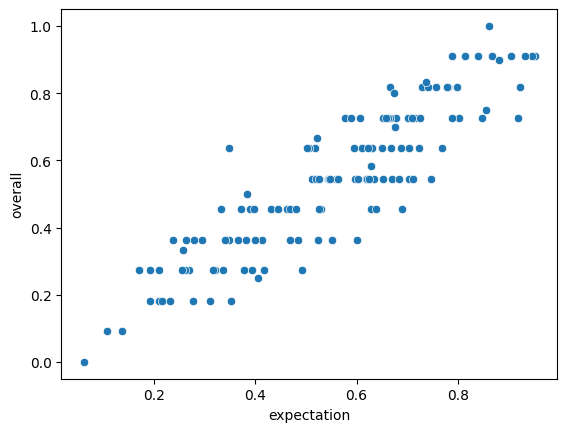

In [19]:
from seaborn import scatterplot
scatterplot(data=df, x='expectation', y='overall', )

Unfortunately actual overall wins step up, while expected wins can be anything from zero to one.

<Axes: xlabel='expectation', ylabel='overall'>

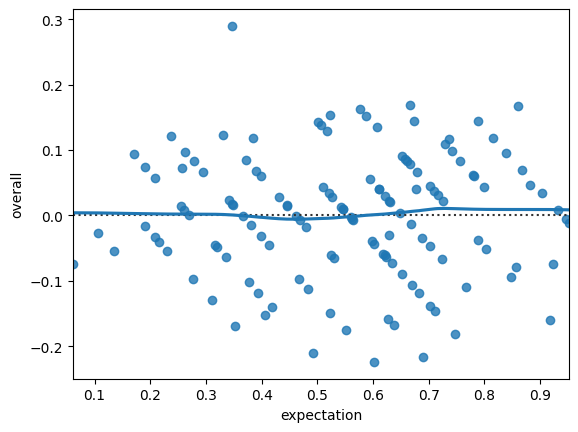

In [20]:
from seaborn import residplot

residplot(data=df, x='expectation', y='overall', lowess=True)

Let's make a crude scatter plot with names.

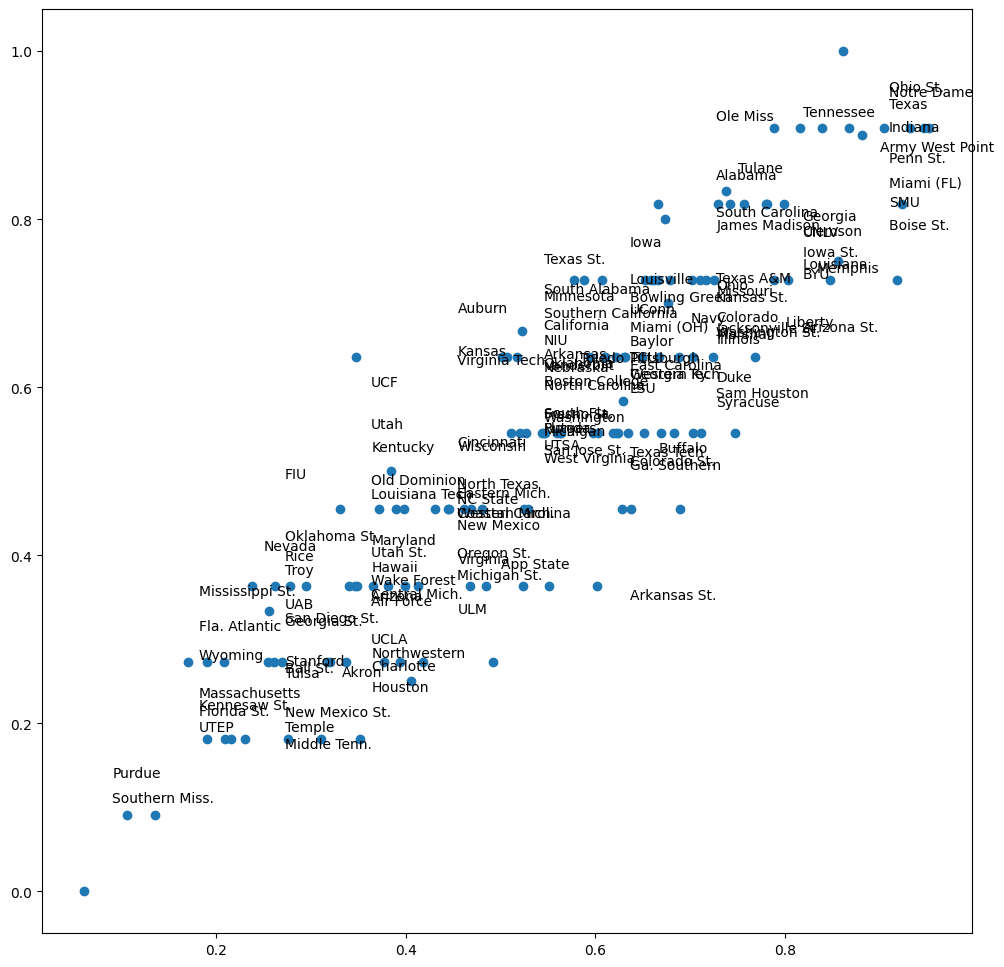

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(df['expectation'], df['overall'])

for index, row in df.iterrows():
    ax.annotate(row['name'], ( row['overall'], row['expectation']))

Is our geometric mean Gaussian? 

<Axes: ylabel='Density'>

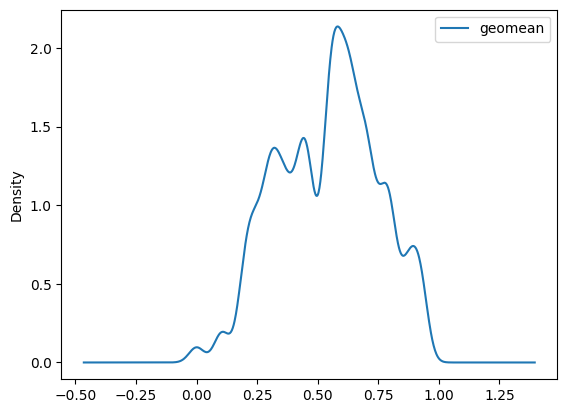

In [22]:
df[['geomean']].plot(kind='kde', bw_method=0.15)

In [23]:
from scipy.stats import normaltest

for column in ['expectation', 'overall', 'geomean']:
    print(normaltest(a=df[column]))

NormaltestResult(statistic=6.089778158447217, pvalue=0.04760159170021884)
NormaltestResult(statistic=6.031551324824933, pvalue=0.04900780722639429)
NormaltestResult(statistic=5.001116150193863, pvalue=0.08203920181055425)


Yes, our winning percentages are Gaussian.